## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("./Base_Etudiant.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_et                  2621 non-null   object 
 1   date_nais_et           2621 non-null   object 
 2   lieu_nais_et           2619 non-null   object 
 3   date_bac               2259 non-null   object 
 4   etab_bac               2457 non-null   object 
 5   niveau_diplome_sup_et  2259 non-null   float64
 6   lib_specialite_esp_et  2621 non-null   object 
 7   date_entree_esp_et     1388 non-null   object 
 8   lib_nature_bac         2563 non-null   object 
 9   classe_courante_et     2621 non-null   object 
 10  classe_sem1            2369 non-null   object 
 11  niveau_courant_et      2621 non-null   int64  
 12  sexe                   2621 non-null   object 
 13  nationalite            2619 non-null   object 
 14  niveau_acces           2621 non-null   int64  
 15  clas

In [4]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

lieu_nais_et: 0.0008% missing values
date_bac: 0.1381% missing values
etab_bac: 0.0626% missing values
date_entree_esp_et: 0.4704% missing values
lib_nature_bac: 0.0221% missing values
classe_sem1: 0.0961% missing values
nationalite: 0.0008% missing values
classe_prec_et: 0.3453% missing values
resultat_annee_prec: 0.3571% missing values
gouvernorat: 0.1702% missing values


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
niveau_diplome_sup_et,2259.0,0.691014,1.233990,0.0,0.0000,0.00,1.0000,3.00
niveau_courant_et,2621.0,1.839756,0.839551,1.0,1.0000,2.00,2.0000,4.00
niveau_acces,2621.0,2.688668,1.378122,1.0,1.0000,3.00,4.0000,5.00
moy_bac,2522.0,11.096622,1.884248,9.0,10.0825,10.77,11.7875,76.35
score_final,2621.0,-0.542774,5.143817,-1.0,-1.0000,-1.00,-1.0000,75.08


In [324]:
df.isnull().any()


id_et                    False
date_nais_et             False
lieu_nais_et              True
date_bac                  True
etab_bac                  True
niveau_diplome_sup_et     True
lib_specialite_esp_et    False
date_entree_esp_et        True
lib_nature_bac            True
classe_courante_et       False
classe_sem1               True
niveau_courant_et        False
sexe                     False
nationalite               True
niveau_acces             False
classe_prec_et            True
resultat_annee_prec       True
moy_bac                   True
score_final              False
gouvernorat               True
dtype: bool

In [325]:
df.isnull().sum()


id_et                       0
date_nais_et                0
lieu_nais_et                2
date_bac                  362
etab_bac                  164
niveau_diplome_sup_et     362
lib_specialite_esp_et       0
date_entree_esp_et       1233
lib_nature_bac             58
classe_courante_et          0
classe_sem1               252
niveau_courant_et           0
sexe                        0
nationalite                 2
niveau_acces                0
classe_prec_et            905
resultat_annee_prec       936
moy_bac                    99
score_final                 0
gouvernorat               446
dtype: int64

In [6]:
#drop the column , "etab_bac" et gouvernorat and inplace is true to modify the dataframe
# drop the column classe_sem1 ,it same as Classe_courante
df.drop(["etab_bac","gouvernorat","classe_sem1","sexe"],axis=1,inplace=True)

<Axes: ylabel='resultat_annee_prec'>

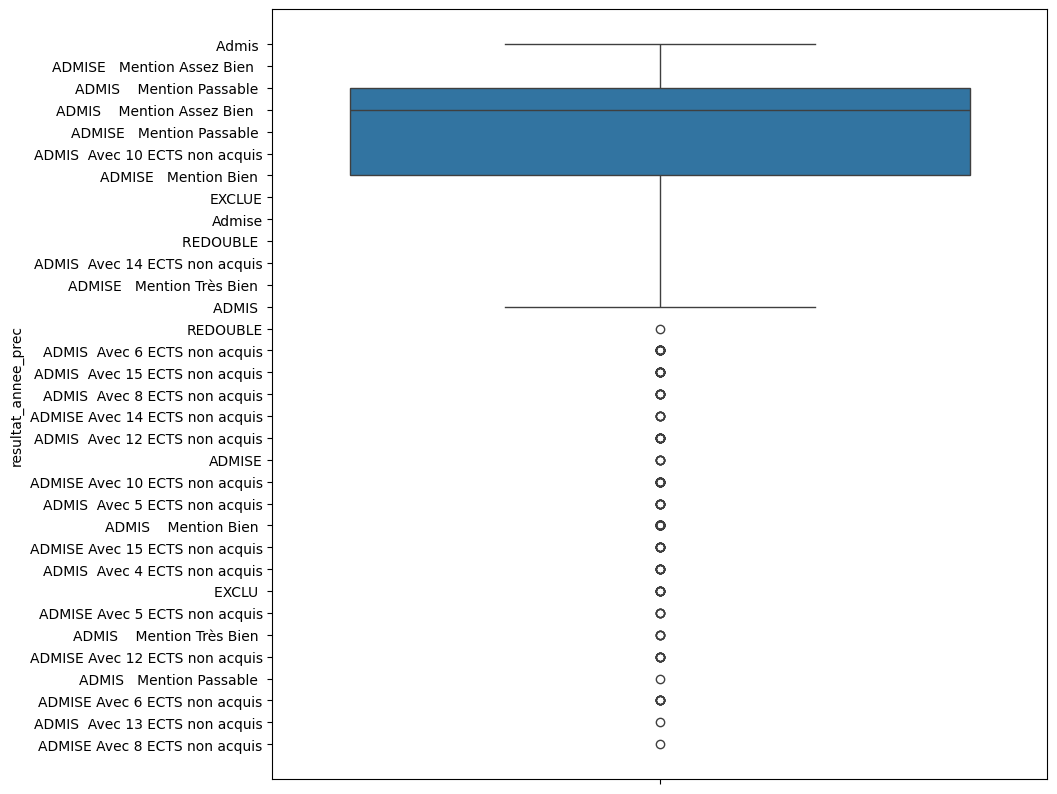

In [327]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df['resultat_annee_prec'], orient = 'v')

In [7]:
#df_copy is deep copy of df
df_copy= df.copy(deep=True)
df_copy

,id_et,date_nais_et,lieu_nais_et,date_bac,niveau_diplome_sup_et,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,niveau_courant_et,nationalite,niveau_acces,classe_prec_et,resultat_annee_prec,moy_bac,score_final
0,ID1,10/07/1996 00:00,Tunis,NaN,NaN,Master Professionnel en Business Analytics,NaN,NaN,2-BA-2,2,TUNISIENNE,5,1-BA-2,Admis,NaN,-1.0
1,ID2,19/12/2002 00:00,TUNIS,01/06/2021 00:00,3.0,Master Professionnel en Marketing Digital,16/09/2024 00:00,Bac Informatique,1-MKD-1,1,TUNISIENNE,4,NaN,NaN,12.91,-1.0
2,ID3,09/08/2003 00:00,TUNIS,01/06/2024 00:00,0.0,Licence en Sciences de Gestion,30/08/2024 00:00,Bac Economie,1-LSG-1,1,TUNISIENNE,1,NaN,NaN,9.81,-1.0
3,ID4,15/09/1999 00:00,TUNIS,NaN,NaN,Master Professionnel en Management Digital et ...,NaN,Bac Economie-gestion,1-MDSI-1,1,TUNISIENNE,4,3-LSG-4,ADMISE Mention Assez Bien,12.00,-1.0
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,0.0,Licence en Sciences de Gestion,18/09/2023 00:00,Bac Economie,2-LSG-3,2,TUNISIENNE,2,1-LSG-8,ADMIS Mention Passable,10.48,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ID2617,12/12/2000 00:00,Tunis,01/06/2022 00:00,0.0,Licence Business Computing- Parcours Business...,NaN,Bac Economie,3LBC-BIS-5,3,TUNISIENNE,3,2-LBC-BIS5,ADMIS Mention Passable,11.12,-1.0
2617,ID2618,08/01/2005 00:00,Le kef,01/06/2023 00:00,0.0,Licence Business Computing,NaN,Bac Sciences expérimentales,2-LBC-6,2,TUNISIENNE,2,1-LBC-9,ADMIS Mention Bien,10.96,-1.0
2618,ID2619,20/06/2004 00:00,La marsa,01/06/2023 00:00,0.0,Licence en Sciences de Gestion,28/08/2023 00:00,Bac Economie,2-LSG-3,2,TUNISIENNE,2,1-LSG-3,ADMIS Avec 10 ECTS non acquis,10.18,-1.0
2619,ID2620,21/01/2004 00:00,Tunis,01/06/2022 00:00,0.0,Licence en Sciences de Gestion -Parcours Compt...,NaN,Bac Sciences expérimentales,3-LSC-2,3,TUNISIENNE,3,2-LSC-2,ADMISE Mention Assez Bien,12.57,-1.0


array([[<Axes: title={'center': 'niveau_diplome_sup_et'}>,
        <Axes: title={'center': 'niveau_courant_et'}>],
       [<Axes: title={'center': 'niveau_acces'}>,
        <Axes: title={'center': 'moy_bac'}>],
       [<Axes: title={'center': 'score_final'}>, <Axes: >]], dtype=object)

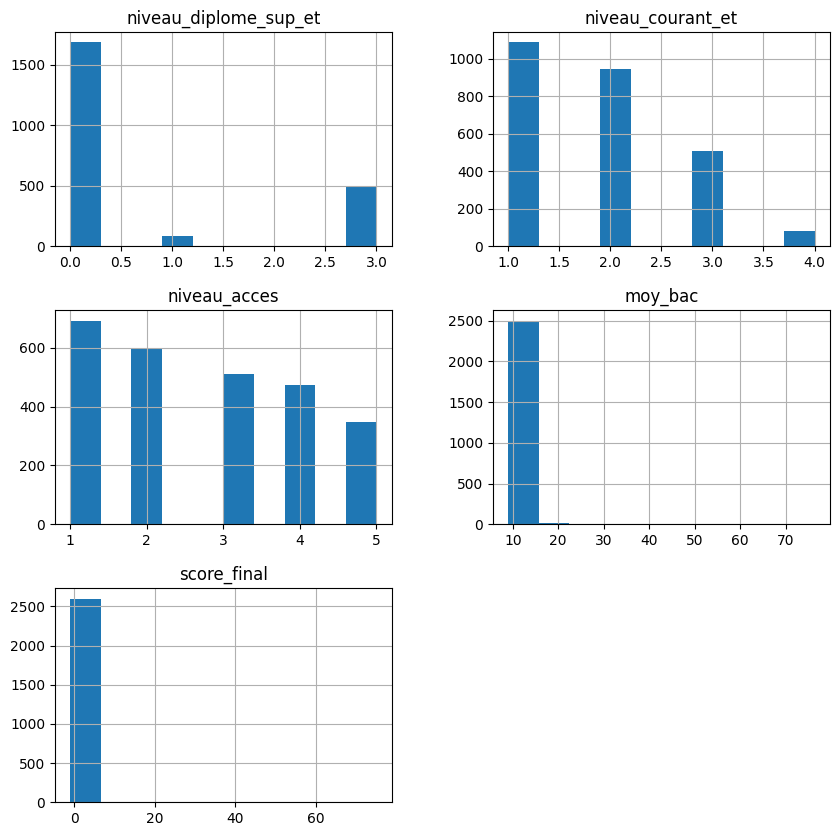

In [329]:
#to understand how to fill the missing values using the mean or the median or the mode , reprsent the distribution of the data
df_copy.hist(figsize=(10,10))

array([[<Axes: title={'center': 'niveau_diplome_sup_et'}>,
        <Axes: title={'center': 'niveau_courant_et'}>],
       [<Axes: title={'center': 'niveau_acces'}>,
        <Axes: title={'center': 'moy_bac'}>],
       [<Axes: title={'center': 'score_final'}>, <Axes: >]], dtype=object)

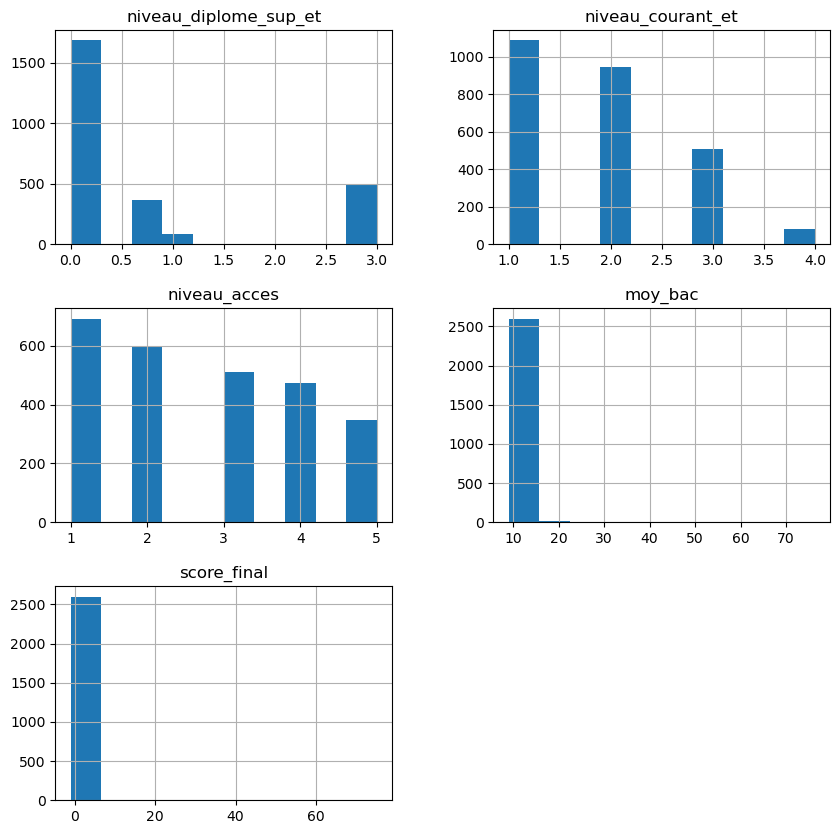

In [8]:
# Fill missing values with the mean of each column
df_copy[['niveau_diplome_sup_et', 'moy_bac']] = df_copy[['niveau_diplome_sup_et', 'moy_bac']].fillna(df_copy[['niveau_diplome_sup_et', 'moy_bac']].mean())
# Now create histograms
df_copy.hist(figsize=(10, 10))

In [9]:
#find the frequent gap between column date_bac and date_nais_et
from datetime import datetime

# Convert the date columns to datetime objects
df['date_bac'] = pd.to_datetime(df['date_bac'], format='%d/%m/%Y %H:%M', errors='coerce')
df['date_nais_et'] = pd.to_datetime(df['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate the gap and find the most frequent gap
frequent_gap = (df['date_bac'] - df['date_nais_et']).mean()
frequent_gap
#conert frequent_gap to years
frequent_gap = int(frequent_gap.days / 365)
frequent_gap

19

In [10]:
from datetime import datetime

def convert_date(date_naiss):
    # Convert Timestamp to string if needed
    if isinstance(date_naiss, pd.Timestamp):
        date_naiss = date_naiss.strftime('%d/%m/%Y %H:%M')
    
    date_obj = datetime.strptime(date_naiss, '%d/%m/%Y %H:%M')
    us_format = date_obj.strftime('%d/%m/%Y %H:%M')
    year = int(us_format[6:10]) + 19
    return '01/06/' + str(year) + ' 00:00'

In [11]:
print(convert_date(df['date_nais_et'].loc[df['id_et']=='ID619'].iloc[0]))

01/06/2024 00:00


In [12]:
#fill missing value of df_copy['date_bac'] with the result of the function convert_date
df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)
print(df_copy['date_bac'].iloc[0])

01/06/2015 00:00


C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_20376\4189537486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_bac'].fillna(df['date_nais_et'].apply(convert_date),inplace=True)


In [13]:
# Convert missing values in date_entree_esp_et based on the value in lib_nature_bac
def convert_date_entree_esp_et(row):
    if row['lib_specialite_esp_et'].startswith('Licence'):
        start_date = row['date_bac']
    else:
        start_date = str("16/09/") + str(int(row['date_bac'][6:10]) + 3) + row['date_bac'][10:]
    return start_date



In [14]:
# Fill missing values in date_entree_esp_et
df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)

C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_20376\2939815041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['date_entree_esp_et'].fillna(df_copy.apply(convert_date_entree_esp_et, axis=1), inplace=True)


In [15]:
print(df_copy['date_entree_esp_et'].iloc[3])
print(df_copy['date_bac'].loc[df['id_et']=='ID445'])
print(df_copy['date_entree_esp_et'].loc[df['id_et']=='ID445'])

16/09/2021 00:00
444    01/06/2020 00:00
Name: date_bac, dtype: object
444    16/09/2023 00:00
Name: date_entree_esp_et, dtype: object


In [16]:
df_copy.isnull().sum()

id_et                      0
date_nais_et               0
lieu_nais_et               2
date_bac                   0
niveau_diplome_sup_et      0
lib_specialite_esp_et      0
date_entree_esp_et         0
lib_nature_bac            58
classe_courante_et         0
niveau_courant_et          0
nationalite                2
niveau_acces               0
classe_prec_et           905
resultat_annee_prec      936
moy_bac                    0
score_final                0
dtype: int64

In [17]:
#fillissing values in nationalite by the most frequent value
df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)

C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_20376\2429789071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['nationalite'].fillna(df_copy['nationalite'].mode()[0],inplace=True)


In [18]:
#fill missing values in classe_prec_et
#count df_copy['date_bac'].year()==2024 
df_copy['date_bac'].apply(lambda x: x[6:10]=='2024').value_counts() 

date_bac
False    2194
True      427
Name: count, dtype: int64

In [19]:
#remove students enrolled in 2024
# Create a boolean mask where the year in 'date_bac' is 2024
mask = df_copy['date_bac'].apply(lambda x: x[6:10] == '2024')

# Use the mask to drop the rows where the year is 2024, inplace
df_copy.drop(df_copy[mask].index, inplace=True)

In [20]:
df_copy.isnull().sum()

id_et                      0
date_nais_et               0
lieu_nais_et               1
date_bac                   0
niveau_diplome_sup_et      0
lib_specialite_esp_et      0
date_entree_esp_et         0
lib_nature_bac            50
classe_courante_et         0
niveau_courant_et          0
nationalite                0
niveau_acces               0
classe_prec_et           478
resultat_annee_prec      509
moy_bac                    0
score_final                0
dtype: int64

In [21]:
print(df_copy['id_et'].loc[pd.isna(df['classe_prec_et'])].count())

478


In [22]:
df_copy.isnull().sum()

id_et                      0
date_nais_et               0
lieu_nais_et               1
date_bac                   0
niveau_diplome_sup_et      0
lib_specialite_esp_et      0
date_entree_esp_et         0
lib_nature_bac            50
classe_courante_et         0
niveau_courant_et          0
nationalite                0
niveau_acces               0
classe_prec_et           478
resultat_annee_prec      509
moy_bac                    0
score_final                0
dtype: int64

In [23]:
df_copy_backup = df_copy.copy()

In [24]:
# Create a boolean mask for the condition to drop rows for students starting this year : 2024
mask = df_copy['date_entree_esp_et'].apply(lambda x: x[6:10] == '2024' if pd.notnull(x) else False) | \
       df_copy['date_bac'].apply(lambda x: x[6:10] == '2024' if pd.notnull(x) else False)

# Use the mask to drop the rows where the condition is True, inplace
df_copy.drop(df_copy[mask].index, inplace=True)


In [349]:
df_copy.isnull().sum()

id_et                     0
date_nais_et              0
lieu_nais_et              1
date_bac                  0
niveau_diplome_sup_et     0
lib_specialite_esp_et     0
date_entree_esp_et        0
lib_nature_bac           46
classe_courante_et        0
niveau_courant_et         0
nationalite               0
niveau_acces              0
classe_prec_et           67
resultat_annee_prec      98
moy_bac                   0
score_final               0
dtype: int64

In [25]:
print(df_copy['date_entree_esp_et'].loc[df_copy['id_et']=='ID82'])
#drop the row with missing value in classe_prec_et and resultat_annee_prec
df_copy.dropna(subset=['classe_prec_et','resultat_annee_prec'],inplace=True)

81    16/09/2023 00:00
Name: date_entree_esp_et, dtype: object


In [26]:
df_copy['lib_nature_bac'].unique()

array([nan, 'Bac Economie-gestion', 'Bac Economie',
       'Bac Sciences expérimentales', 'Bac Math', 'Bac téchnique',
       'Bac Technique', 'Scientifique', 'Bac Math ', 'Autre bac',
       'Bac Informatique', 'Bac Français', 'MATH GENIE CEVIL',
       'Bac Général', 'Economique et social'], dtype=object)

In [27]:
#clean the column 'lib_nature_bac' by replacing 'Bac Economie-gestion' with 'Bac Economie' 
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.lower().str.strip()
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac economie-gestion\b|\beconomique et social\b', 'bac economie', regex=True)
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac téchnique', 'bac technique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace('bac sciences expérimentales','scientifique')
df_copy['lib_nature_bac'] = df_copy['lib_nature_bac'].str.replace(r'\bbac français\b|\bbac général\b', 'autre bac', regex=True)

# Fill missing values in 'lib_nature_bac' with the mode
mode_value = df_copy['lib_nature_bac'].mode()[0]
df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)

C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_20376\1648776214.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['lib_nature_bac'].fillna(mode_value, inplace=True)


In [28]:
#remove the last 2 caracters in the column 'classe_prec_et' and 'classe_courante_et'
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[:-2])
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[:-2])

In [29]:
#Categorical Values
df_categorical = df_copy.select_dtypes(include = 'object').copy()
df_categorical

,id_et,date_nais_et,lieu_nais_et,date_bac,lib_specialite_esp_et,date_entree_esp_et,lib_nature_bac,classe_courante_et,nationalite,classe_prec_et,resultat_annee_prec
0,ID1,10/07/1996 00:00,Tunis,01/06/2015 00:00,Master Professionnel en Business Analytics,16/09/2018 00:00,bac economie,2-BA,TUNISIENNE,1-BA,Admis
3,ID4,15/09/1999 00:00,TUNIS,01/06/2018 00:00,Master Professionnel en Management Digital et ...,16/09/2021 00:00,bac economie,1-MDSI,TUNISIENNE,3-LSG,ADMISE Mention Assez Bien
4,ID5,17/10/1999 00:00,Bizerte,01/06/2020 00:00,Licence en Sciences de Gestion,18/09/2023 00:00,bac economie,2-LSG,TUNISIENNE,1-LSG,ADMIS Mention Passable
7,ID8,09/09/2002 00:00,Gafsa,01/06/2022 00:00,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,TUNISIENNE,2-LBC-BI,ADMIS Mention Assez Bien
8,ID9,12/06/2003 00:00,Benguerden,01/06/2022 00:00,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,TUNISIENNE,2-LBC-BI,ADMISE Mention Passable
...,...,...,...,...,...,...,...,...,...,...,...
2616,ID2617,12/12/2000 00:00,Tunis,01/06/2022 00:00,Licence Business Computing- Parcours Business...,01/06/2022 00:00,bac economie,3LBC-BIS,TUNISIENNE,2-LBC-BI,ADMIS Mention Passable
2617,ID2618,08/01/2005 00:00,Le kef,01/06/2023 00:00,Licence Business Computing,01/06/2023 00:00,scientifique,2-LBC,TUNISIENNE,1-LBC,ADMIS Mention Bien
2618,ID2619,20/06/2004 00:00,La marsa,01/06/2023 00:00,Licence en Sciences de Gestion,28/08/2023 00:00,bac economie,2-LSG,TUNISIENNE,1-LSG,ADMIS Avec 10 ECTS non acquis
2619,ID2620,21/01/2004 00:00,Tunis,01/06/2022 00:00,Licence en Sciences de Gestion -Parcours Compt...,01/06/2022 00:00,scientifique,3-LSC,TUNISIENNE,2-LSC,ADMISE Mention Assez Bien


In [355]:
df_copy.isnull().sum()

id_et                    0
date_nais_et             0
lieu_nais_et             1
date_bac                 0
niveau_diplome_sup_et    0
lib_specialite_esp_et    0
date_entree_esp_et       0
lib_nature_bac           0
classe_courante_et       0
niveau_courant_et        0
nationalite              0
niveau_acces             0
classe_prec_et           0
resultat_annee_prec      0
moy_bac                  0
score_final              0
dtype: int64

In [30]:
#give this student the most frequent value of lieu_nais_et
df_copy['lieu_nais_et'].fillna(df_copy['lieu_nais_et'].mode()[0],inplace=True)

C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_20376\2969168987.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['lieu_nais_et'].fillna(df_copy['lieu_nais_et'].mode()[0],inplace=True)


In [31]:
#drop column 'lieu_nais_et'
df_copy.drop(['lieu_nais_et'],axis=1,inplace=True)

In [32]:
df_copy.drop(['id_et'],axis=1,inplace=True)

#### Frequency Encoding

In [33]:
#Use Frequency encoding for nationalite
# Calculate the frequency of each category in 'nationalite'
nationalite_freq = df_copy['nationalite'].value_counts(normalize=True)
# Map the frequency values back to the 'nationalite' column
df_copy['nationalite_encoded'] = df_copy['nationalite'].map(nationalite_freq)

In [34]:
# Convert column date_nais_et into an Age column and take the current year as 2024
now = pd.Timestamp('now').year
df_copy['date_nais_et'] = pd.to_datetime(df_copy['date_nais_et'], format='%d/%m/%Y %H:%M', errors='coerce')
# Create a new column 'age' and drop the column 'date_nais_et'
df_copy['age'] = now - df_copy['date_nais_et'].dt.year
df_copy.drop(['date_nais_et'], axis=1, inplace=True)


In [37]:
#convert resultat_annee_prec into lowercase and remove extra spaces and leading spaces and for startwith(Admise) turn it into admis
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'admis' if x.startswith('admise') else x)
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: 'exclu' if x.startswith('exclue') else x)
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(lambda x: ' '.join(x.lower().strip().split()))

In [38]:
df_copy['resultat_annee_prec'].unique()

array(['admis', 'admis mention passable', 'admis mention assez bien',
       'admis avec 10 ects non acquis', 'exclu', 'redouble',
       'admis avec 14 ects non acquis', 'admis avec 6 ects non acquis',
       'admis avec 15 ects non acquis', 'admis avec 8 ects non acquis',
       'admis avec 12 ects non acquis', 'admis avec 5 ects non acquis',
       'admis mention bien', 'admis avec 4 ects non acquis',
       'admis mention très bien', 'admis avec 13 ects non acquis'],
      dtype=object)

#### Label Encoding of Categorical Feature

In [39]:
#use Label encoding for the column 'lib_nature_bac'
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df_copy['lib_nature_bac_encoded'] = (labelencoder_y.fit_transform(df_copy['lib_nature_bac'])).astype('int64') 


In [40]:
#use Label encoding for the column 'resultat_annee_prec'
'''from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df_copy['resultat_annee_prec'] = (labelencoder_y.fit_transform(df_copy['resultat_annee_prec'])).astype('int64') 
df_copy'''

"from sklearn.preprocessing import LabelEncoder\nlabelencoder_y = LabelEncoder()\ndf_copy['resultat_annee_prec'] = (labelencoder_y.fit_transform(df_copy['resultat_annee_prec'])).astype('int64') \ndf_copy"

In [41]:
def custom_grade_encoder(grade):
    # Dictionary mapping grades to numerical values
    grade_mapping = {
        'exclu': 0,                           # Excluded - lowest
        'redouble': 1,                        # Repeat year
        'admis avec 15 ects non acquis': 2,   # Most ECTS credits missing
        'admis avec 14 ects non acquis': 3,
        'admis avec 13 ects non acquis': 4,
        'admis avec 12 ects non acquis': 5,
        'admis avec 10 ects non acquis': 6,
        'admis avec 8 ects non acquis': 7,
        'admis avec 6 ects non acquis': 8,
        'admis avec 5 ects non acquis': 9,
        'admis avec 4 ects non acquis': 10,   # Least ECTS credits missing
        'admis': 11,                          # Basic pass
        'admis mention passable': 12,         # Pass with fair mention
        'admis mention assez bien': 13,       # Pass with fairly good mention
        'admis mention bien': 14,             # Pass with good mention
        'admis mention très bien': 15         # Pass with very good mention - highest
    }
    return grade_mapping.get(grade, -1)  # Returns -1 for any unknown grade

# Apply the encoding to your dataframe
df_copy['resultat_annee_prec'] = df_copy['resultat_annee_prec'].apply(custom_grade_encoder)

In [42]:
#we start for variable lib_nature_bac
df_categorical['lib_nature_bac'].unique()

array(['bac economie', 'scientifique', 'bac math', 'bac technique',
       'autre bac', 'bac informatique', 'math genie cevil'], dtype=object)

In [43]:
#clean the column=[classe_courante_et,classe_courante_et,classe_prec_et] by removing the first character or 2 first characters if 2nd character is a '-'
df_copy['classe_courante_et'] = df_copy['classe_courante_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])
df_copy['classe_prec_et'] = df_copy['classe_prec_et'].apply(lambda x: x[2:] if x[1] == '-' else x[1:])



### Target Encoding of Categorical Features

In [211]:
'''# Calculate the mean of the target for each category in 'lib_nature_bac'
target_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()
# Map the calculated means back to the 'lib_nature_bac' column
df_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)'''


"# Calculate the mean of the target for each category in 'lib_nature_bac'\ntarget_mean = df_copy.groupby('lib_nature_bac')['resultat_annee_prec'].mean()\n# Map the calculated means back to the 'lib_nature_bac' column\ndf_copy['lib_nature_bac_encoded'] = df_copy['lib_nature_bac'].map(target_mean)"

In [44]:
# Calculate the mean of the target for 'lib_specialite_esp_et'
specialite_mean = df_copy.groupby('lib_specialite_esp_et')['resultat_annee_prec'].mean()

# Map the calculated means back
df_copy['lib_specialite_esp_et_encoded'] = df_copy['lib_specialite_esp_et'].map(specialite_mean)

In [45]:
# Calculate the mean of the target for 'classe_courante_et'
courante_mean = df_copy.groupby('classe_courante_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_courante_et_encoded'] = df_copy['classe_courante_et'].map(courante_mean)

In [46]:
# Calculate the mean of the target for 'classe_prec_et'
prec_mean = df_copy.groupby('classe_prec_et')['resultat_annee_prec'].mean()
# Map the calculated means back
df_copy['classe_prec_et_encoded'] = df_copy['classe_prec_et'].map(prec_mean)

In [47]:
df_copy['resultat_annee_prec'] = pd.to_numeric(df_copy['resultat_annee_prec'], errors='coerce')

In [48]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy.select_dtypes(include=['int64', 'float64']))
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.select_dtypes(include=['int64', 'float64']).columns)
df_scaled.head()

,niveau_diplome_sup_et,niveau_courant_et,niveau_acces,resultat_annee_prec,moy_bac,score_final,nationalite_encoded,lib_nature_bac_encoded,lib_specialite_esp_et_encoded,classe_courante_et_encoded,classe_prec_et_encoded
0,0.141258,-0.313343,1.622748,0.146875,0.058491,-0.104915,0.096855,-0.741509,0.692833,0.888150,1.282379
1,0.141258,-1.913771,0.791019,0.146875,0.754837,-0.104915,0.096855,-0.741509,0.669471,0.698455,-0.399339
2,-0.542005,-0.313343,-0.872440,0.483126,-0.416817,-0.104915,0.096855,-0.741509,-0.807573,-0.893795,-0.399339
3,-0.542005,1.287085,-0.040710,0.819376,0.677755,-0.104915,0.096855,-0.741509,0.961756,1.029546,0.890816
4,-0.542005,1.287085,-0.040710,0.146875,0.246093,-0.104915,0.096855,-0.741509,0.961756,1.029546,0.890816


In [49]:
# transform features dates into year format
import datetime
columns_to_transform = ['date_bac','date_entree_esp_et']
for col in columns_to_transform:
    df_copy[col] = df_copy[col].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').year)


## Detect outliers

### Outliers on original data


In [ ]:
for feature in df_scaled.select_dtypes(include=['int64', 'float64']).columns:
    data=df_scaled.select_dtypes(include=['int64', 'float64']).copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

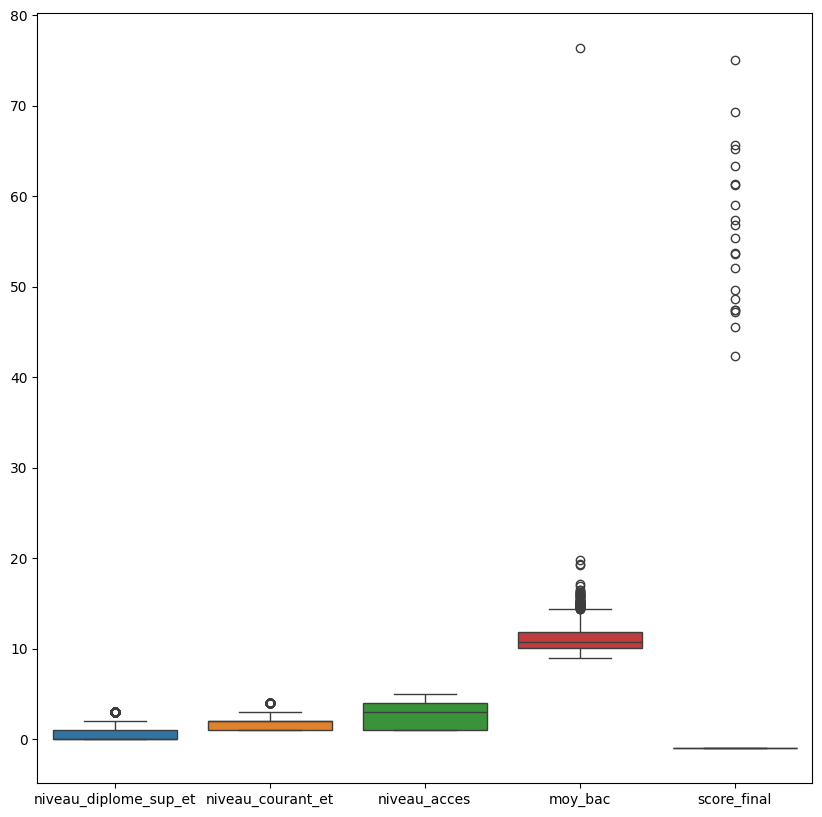

In [219]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=0)
plt.show()

In [220]:
Q1 = df_copy['resultat_annee_prec'].quantile(0.25)
Q3 = df_copy['resultat_annee_prec'].quantile(0.75)
IQR = df_copy['resultat_annee_prec'].quantile(0.75) - df_copy['resultat_annee_prec'].quantile(0.25)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("IQR:", IQR)
# Detect outliers
outliers = df_copy[(df_copy['resultat_annee_prec'] < lower_bound) | (df_copy['resultat_annee_prec'] > upper_bound)]
print("Outliers: ",outliers)

Lower bound: -7.0
Upper bound: 41.0
IQR: 12.0
Outliers:  Empty DataFrame
Columns: [date_bac, niveau_diplome_sup_et, lib_specialite_esp_et, date_entree_esp_et, lib_nature_bac, classe_courante_et, niveau_courant_et, nationalite, niveau_acces, classe_prec_et, resultat_annee_prec, moy_bac, score_final, nationalite_encoded, age, lib_nature_bac_encoded, lib_specialite_esp_et_encoded, classe_courante_et_encoded, classe_prec_et_encoded]
Index: []


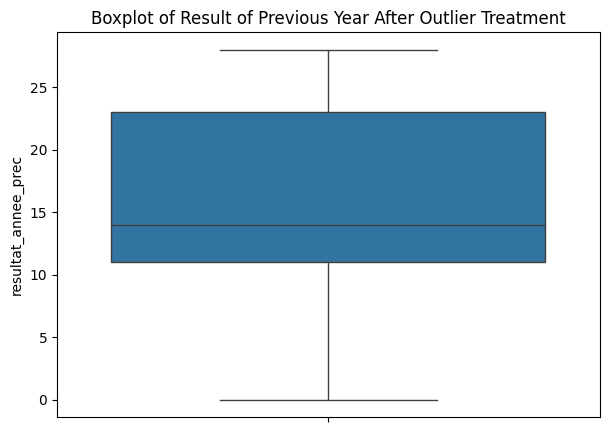

In [221]:
# Visualize the result
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_copy, y='resultat_annee_prec')
plt.title('Boxplot of Result of Previous Year After Outlier Treatment')
plt.show()

#### Outliers on cleaned data

C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_17336\519132197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lib_nature_bac_encoded', y='resultat_annee_prec', data=df_scaled, palette="husl")


Text(0, 0.5, 'Result')

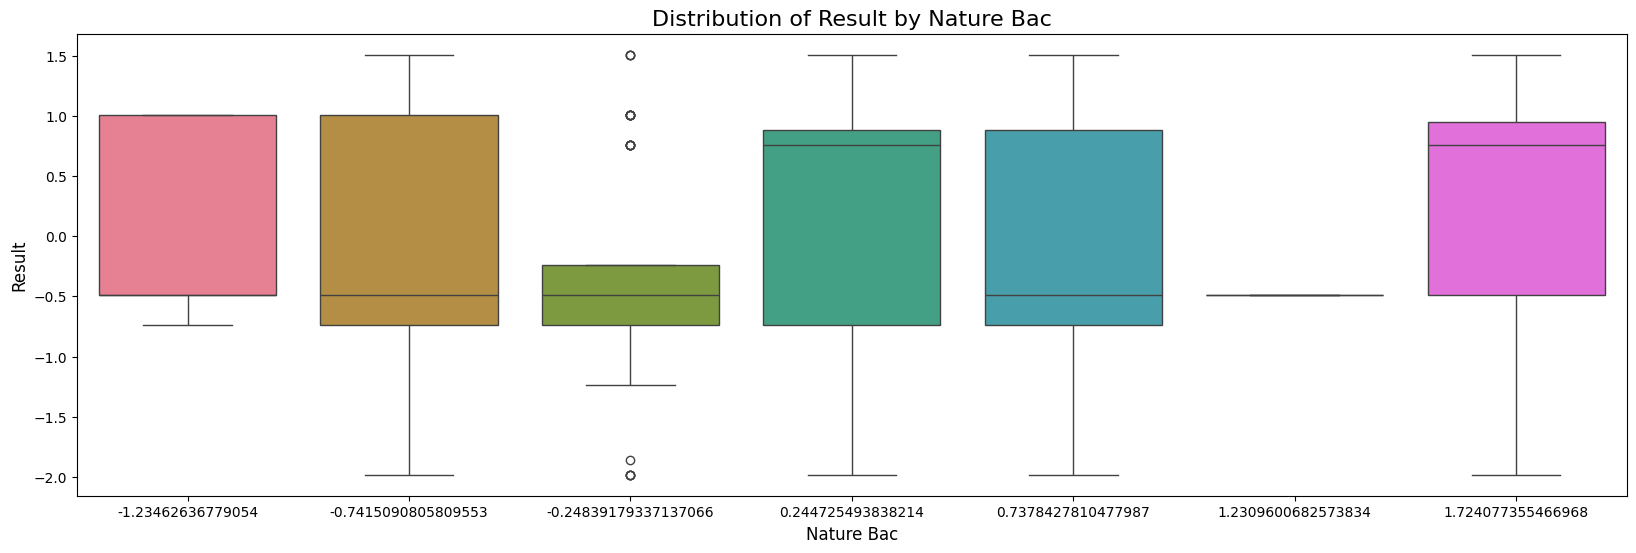

In [222]:
# Create the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='lib_nature_bac_encoded', y='resultat_annee_prec', data=df_scaled, palette="husl")

# Add title and labels
plt.title('Distribution of Result by Nature Bac', fontsize=16)
plt.xlabel('Nature Bac', fontsize=12)
plt.ylabel('Result', fontsize=12)

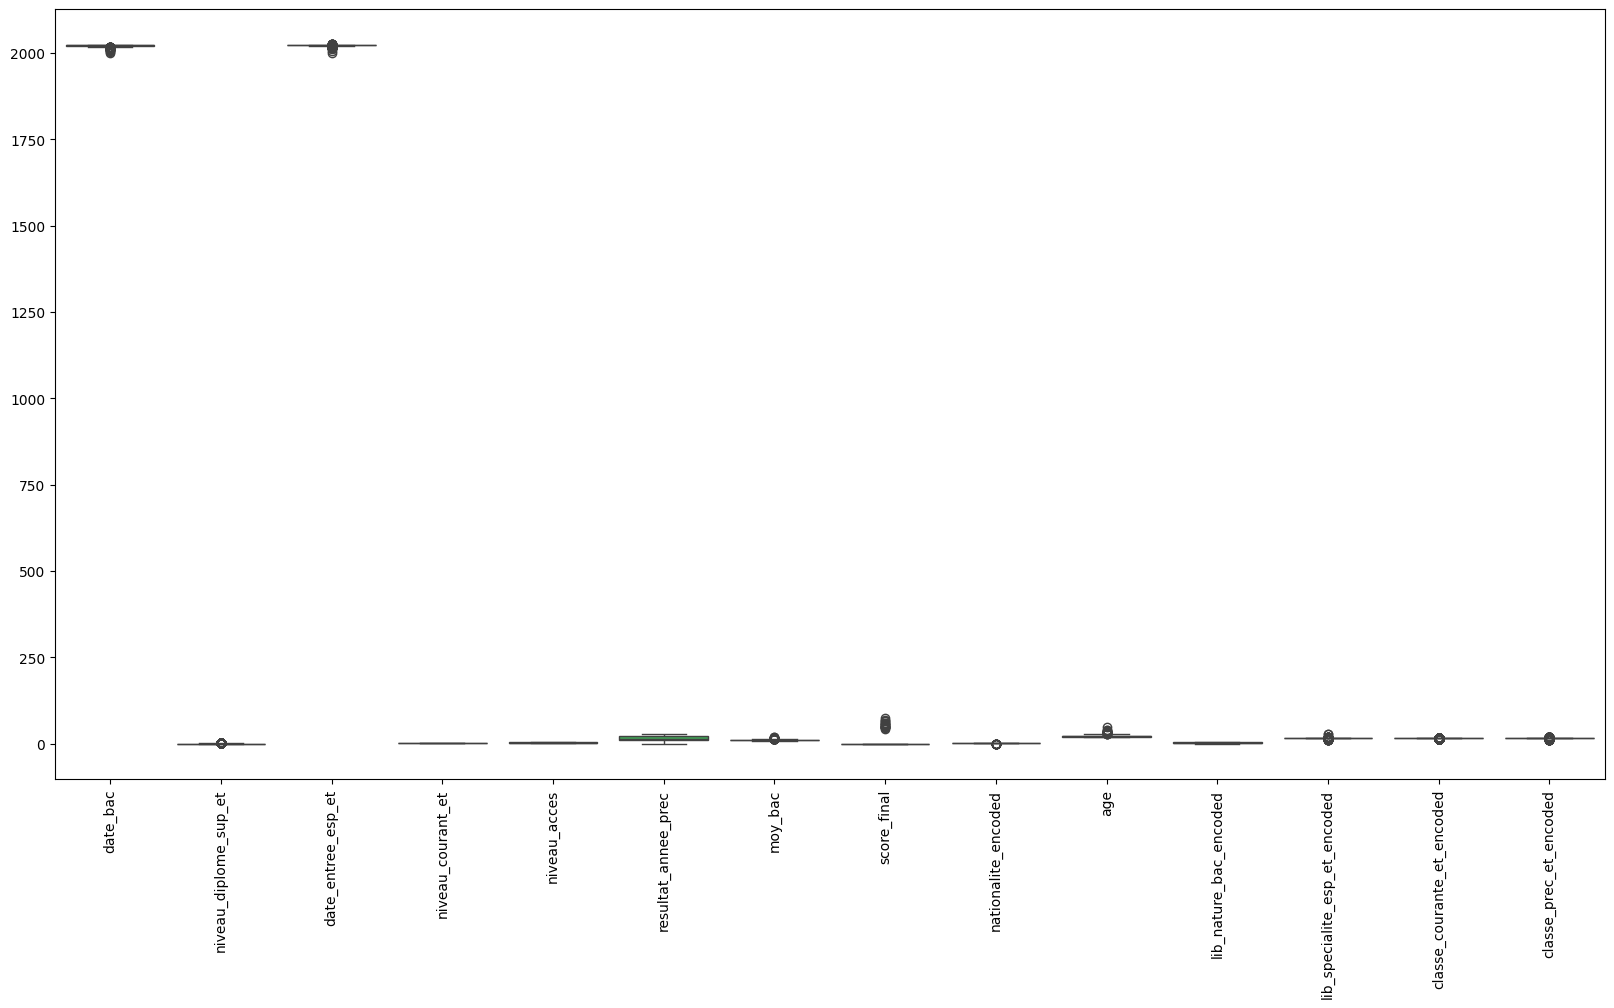

In [223]:
# Create a boxplot to visualize the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df_copy)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='resultat_annee_prec', ylabel='moy_bac'>

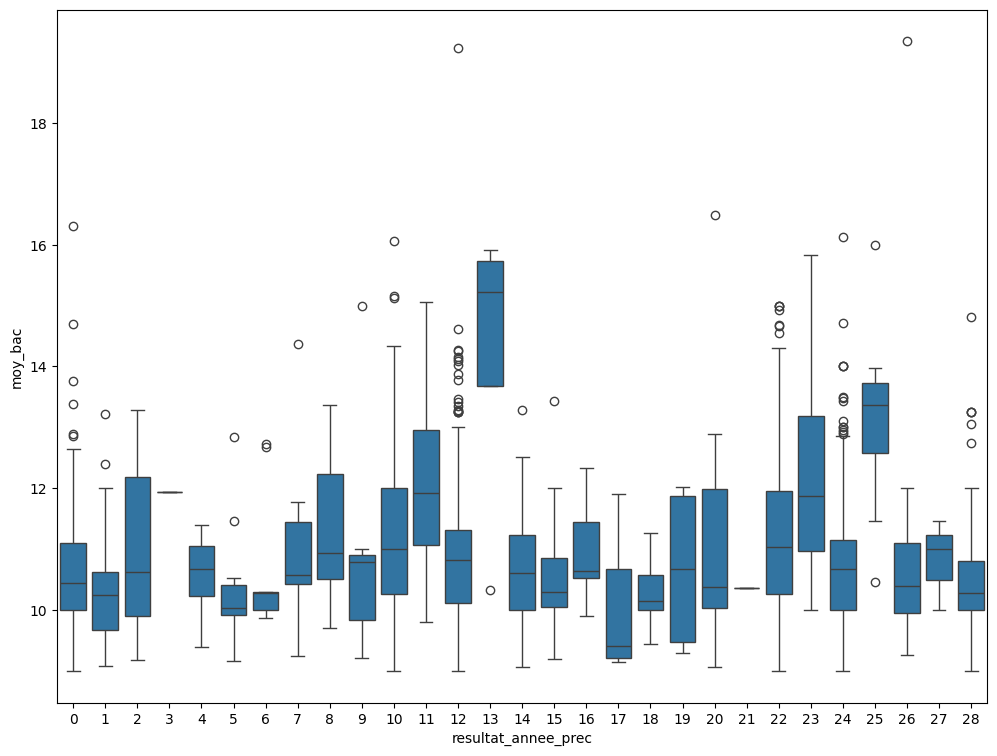

In [224]:
plt.figure(figsize=(12, 9))  
sns.boxplot(data=df_copy, x='resultat_annee_prec', y='moy_bac')

## Observations

#### Descriptive Analysis

In [225]:
def descriptive_analysis(df):
    """
    Perform descriptive analysis on the dataset.
    """
    # Numerical features
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    print("Descriptive Statistics for Numerical Features:")
    print(df[numerical_cols].describe())
    
    # Calculate additional statistics
    for col in numerical_cols:
        print(f"\nStatistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Variance: {df[col].var()}")
        print(f"Standard Deviation: {df[col].std()}")
    
    # Categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print("\nDistribution of Categorical Features:")
    for col in categorical_cols:
        print(f"\nDistribution for {col}:")
        print(df[col].value_counts())

    # Visualizations
    for col in numerical_cols:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.savefig(f'{col}_distribution.png')
        plt.close()

    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Bar Chart of {col}")
        plt.tight_layout()
        plt.savefig(f'{col}_distribution.png')
        plt.close()

#### Correlation Analysis

In [226]:
def correlation_analysis(df):
    """
    Analyze correlations between variables in the dataset.
    """
    # Numerical features correlation
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Pearson correlation
    pearson_corr = df[numerical_cols].corr(method='pearson')
    print("Pearson Correlation Coefficients:")
    print(pearson_corr)
    
    # Spearman correlation
    spearman_corr = df[numerical_cols].corr(method='spearman')
    print("\nSpearman Correlation Coefficients:")
    print(spearman_corr)
    
    # Heatmap for Pearson correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Pearson Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('pearson_correlation_heatmap.png')
    plt.close()
    
    # Heatmap for Spearman correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Spearman Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('spearman_correlation_heatmap.png')
    plt.close()
    
    # Chi-square test for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print("\nChi-square Test Results:")
    for col in categorical_cols:
        for col2 in categorical_cols:
            if col != col2:
                contingency_table = pd.crosstab(df[col], df[col2])
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col} and {col2}: p-value = {p}")
    
    # Point-biserial correlation for binary vs numerical
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    
    print("\nPoint-biserial Correlation Results:")
    for bin_col in binary_cols:
        for num_col in numerical_cols:
            corr, p_value = pointbiserialr(df[bin_col], df[num_col])
            print(f"Point-biserial correlation between {bin_col} and {num_col}: correlation = {corr}, p-value = {p_value}")

#### Summary statistics

In [73]:
#create with plotly histogram histfunc=sum  color=smoker
fig = px.histogram(df_copy, x='classe_courante_et', y='resultat_annee_prec', histfunc='sum', color='age')
fig.show()


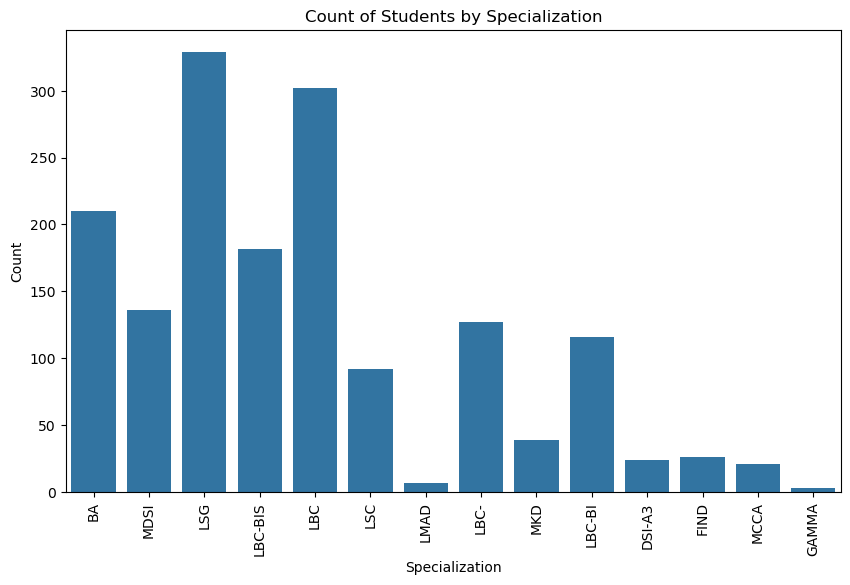

In [66]:
# 3. Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='classe_courante_et')
plt.title('Count of Students by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Bivariate distributions

In [70]:
# scatter of  x=age y=lib_specialite_esp_et with animation over the time 
fig = px.scatter(df_copy, x='age', y='classe_courante_et',size='age',size_max=13, animation_frame='date_entree_esp_et',color='age',hover_name='date_entree_esp_et',
                 title='Specialization vs Age Over Time')
fig.show()

In [92]:
fig = px.scatter(
    data_frame=df_copy,  # Add the dataframe here
    x='moy_bac',
    y='resultat_annee_prec',
    color='moy_bac',
    trendline='ols',
    marginal_x='violin',  # Fixed typo in 'violin'
    marginal_y='box',
    title='Relationship between Bac Average and Previous Year Results',
    width=900,  # Increase width (in pixels)
    height=500,  # Increase height (in pixels)
    # Optional: Make points bigger
    size=[30] * len(df_copy),  # Fixed size for all points
    # Or use a variable for size:
    # size='moy_bac',  # Size based on bac average
    size_max=20  # Maximum size of the markers
)
fig.show()  

In [96]:
df_scaled.columns

Index(['niveau_diplome_sup_et', 'niveau_courant_et', 'niveau_acces',
       'resultat_annee_prec', 'moy_bac', 'score_final', 'nationalite_encoded',
       'lib_nature_bac_encoded', 'lib_specialite_esp_et_encoded',
       'classe_courante_et_encoded', 'classe_prec_et_encoded'],
      dtype='object')

In [102]:
fig = px.scatter_matrix(
    df_copy,
    dimensions=['moy_bac','resultat_annee_prec','lib_nature_bac','classe_courante_et','score_final'],
    color='classe_courante_et',
    title='Scatter Matrix of Numerical Features',
    width=1200,
    height=1200
)


fig.show()

In [228]:
def visualize_encoded_categories(df, category_col, encoded_col, target_col):
    # Define a color palette
    palette = sns.color_palette("hsv", len(df[category_col].unique()))
    
    # Create a mapping from category to color
    color_mapping = {category: palette[i] for i, category in enumerate(df[category_col].unique())}
    
    # Visualize
    plt.figure(figsize=(10, 6))
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        plt.scatter(subset[encoded_col], subset[target_col], 
                    label=category, color=color_mapping[category], alpha=0.6)
    
    plt.title('Visualization with Target Encoding')
    plt.xlabel(encoded_col)
    plt.ylabel(target_col)
    plt.legend(title=category_col)
    plt.show()

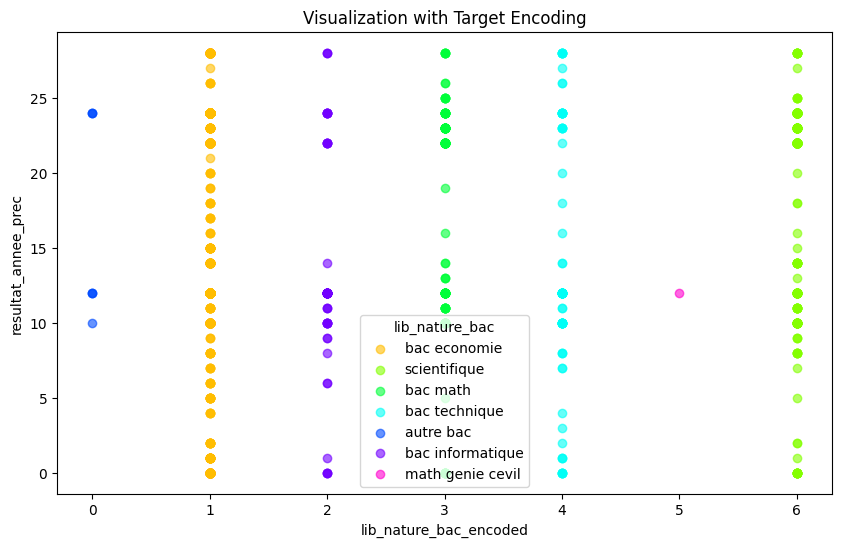

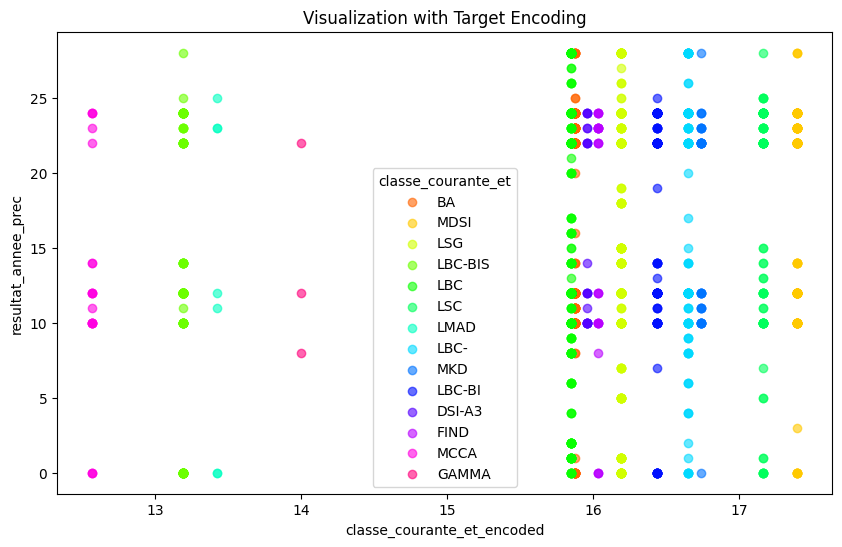

In [229]:
visualize_encoded_categories(df_copy, 'lib_nature_bac', 'lib_nature_bac_encoded', 'resultat_annee_prec')
visualize_encoded_categories(df_copy, 'classe_courante_et', 'classe_courante_et_encoded', 'resultat_annee_prec')


C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_17336\823307766.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['lib_specialite_esp_et_encoded'], shade=True, color='b')
C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_17336\823307766.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['classe_courante_et_encoded'], shade=True, color='r')
C:\Users\sirine jnayeh\AppData\Local\Temp\ipykernel_17336\823307766.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scaled['resultat_annee_prec'], shade=True, color='g')


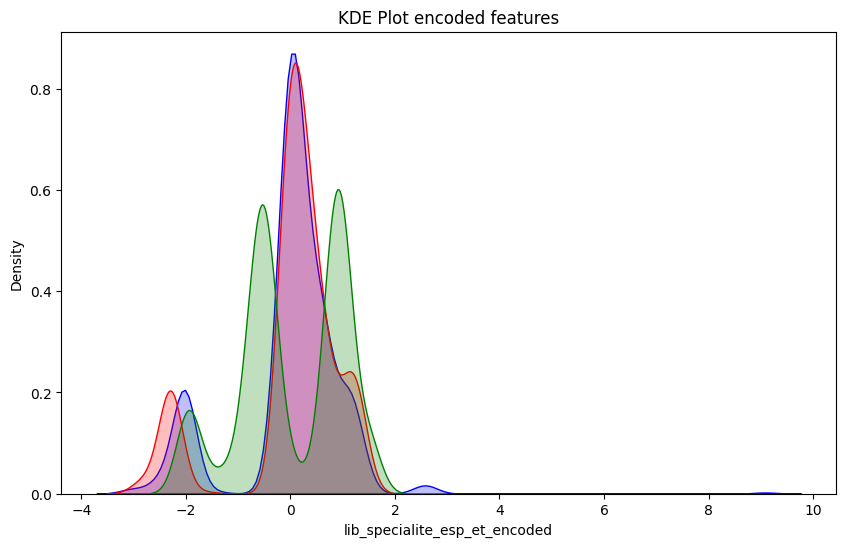

In [230]:
# KDE Plot for 'lib_nature_bac_encoded'
plt.figure(figsize=(10, 6))
sns.kdeplot(df_scaled['lib_specialite_esp_et_encoded'], shade=True, color='b')
sns.kdeplot(df_scaled['classe_courante_et_encoded'], shade=True, color='r')
sns.kdeplot(df_scaled['resultat_annee_prec'], shade=True, color='g')
plt.title('KDE Plot encoded features')
plt.xlabel('lib_specialite_esp_et_encoded')
plt.ylabel('Density')
plt.show()

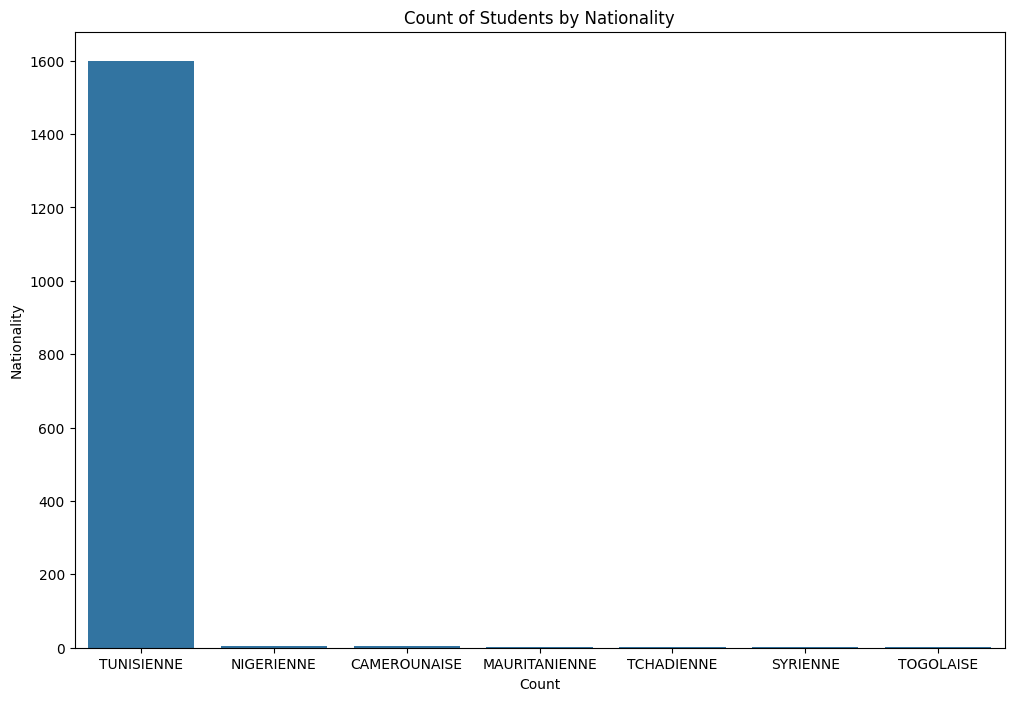

In [231]:
# Horizontal Bar Chart
plt.figure(figsize=(12, 8))
sns.countplot(data=df_copy, x='nationalite', order=df_copy['nationalite'].value_counts().index)
plt.title('Count of Students by Nationality')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

In [103]:
correlation_matrix = df_scaled.select_dtypes(include=['int64', 'float64']).corr()
correlation_matrix.columns

Index(['niveau_diplome_sup_et', 'niveau_courant_et', 'niveau_acces',
       'resultat_annee_prec', 'moy_bac', 'score_final', 'nationalite_encoded',
       'lib_nature_bac_encoded', 'lib_specialite_esp_et_encoded',
       'classe_courante_et_encoded', 'classe_prec_et_encoded'],
      dtype='object')

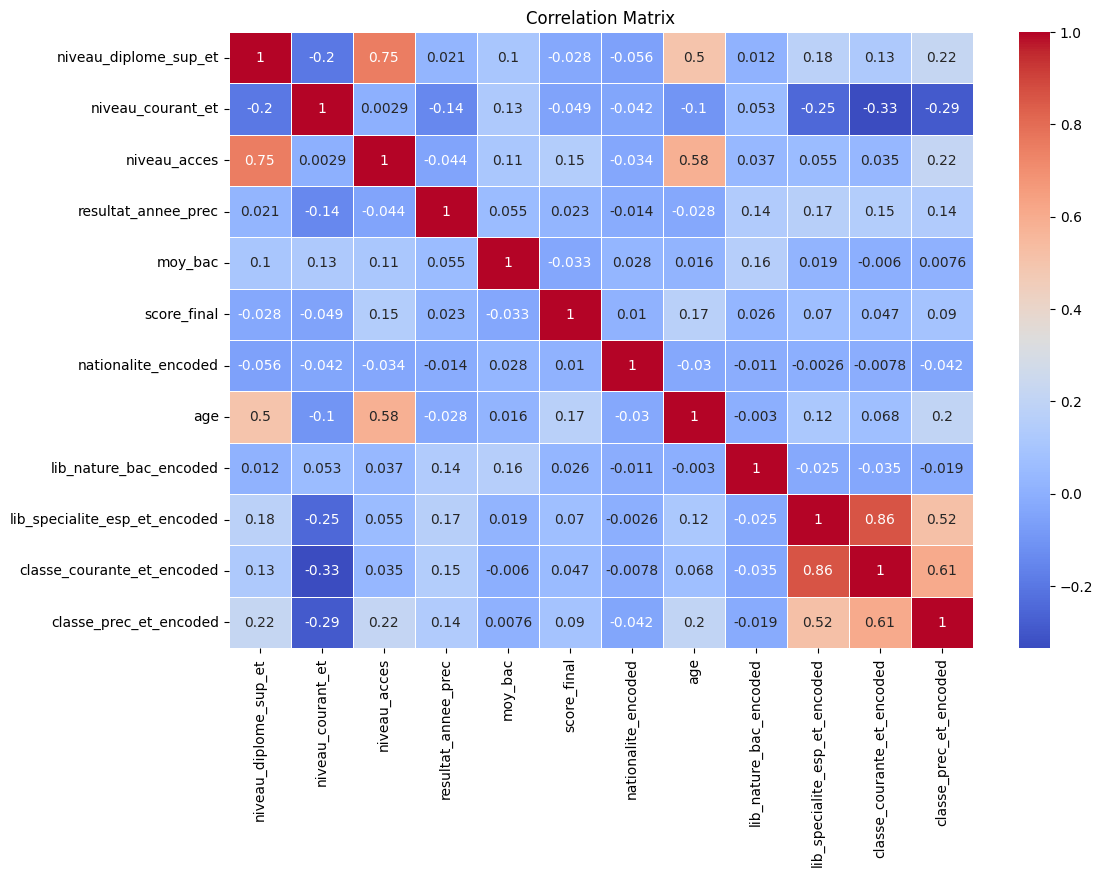

In [232]:
# 5. Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_scaled.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


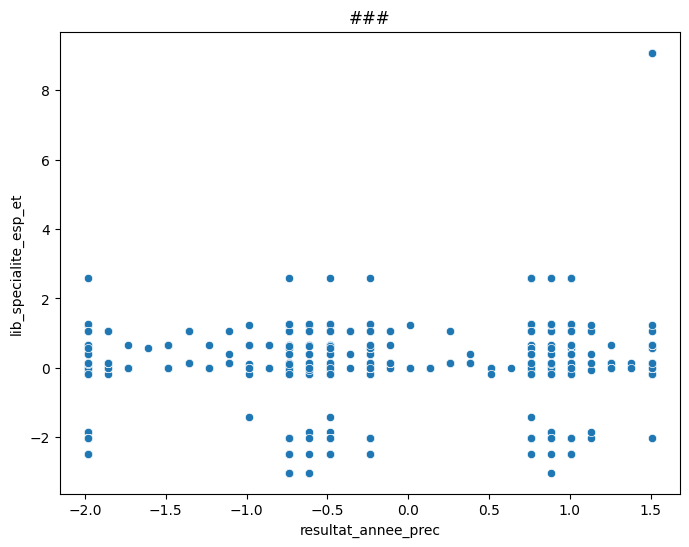

In [233]:
# 6. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='resultat_annee_prec', y='lib_specialite_esp_et_encoded')
plt.title('###')
plt.xlabel('resultat_annee_prec')
plt.ylabel('lib_specialite_esp_et')
plt.show()

In [234]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.select_dtypes(include=['int32','int64', 'float64']).corr()
# Extract the correlation with the target variable 'resultat_annee_prec'
target_correlation = correlation_matrix['resultat_annee_prec'].sort_values(ascending=False)
print(target_correlation)

resultat_annee_prec              1.000000
lib_specialite_esp_et_encoded    0.165820
classe_courante_et_encoded       0.146602
classe_prec_et_encoded           0.137325
lib_nature_bac_encoded           0.135784
moy_bac                          0.054576
score_final                      0.023057
niveau_diplome_sup_et            0.020649
nationalite_encoded             -0.014066
age                             -0.028215
niveau_acces                    -0.044315
niveau_courant_et               -0.144216
Name: resultat_annee_prec, dtype: float64


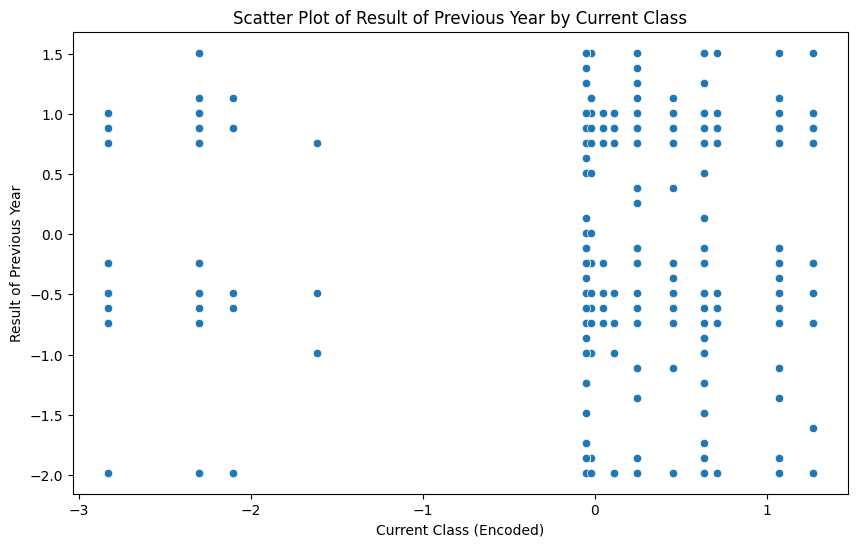

In [235]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='classe_courante_et_encoded', y='resultat_annee_prec')
plt.title('Scatter Plot of Result of Previous Year by Current Class')
plt.xlabel('Current Class (Encoded)')
plt.ylabel('Result of Previous Year')
plt.show()

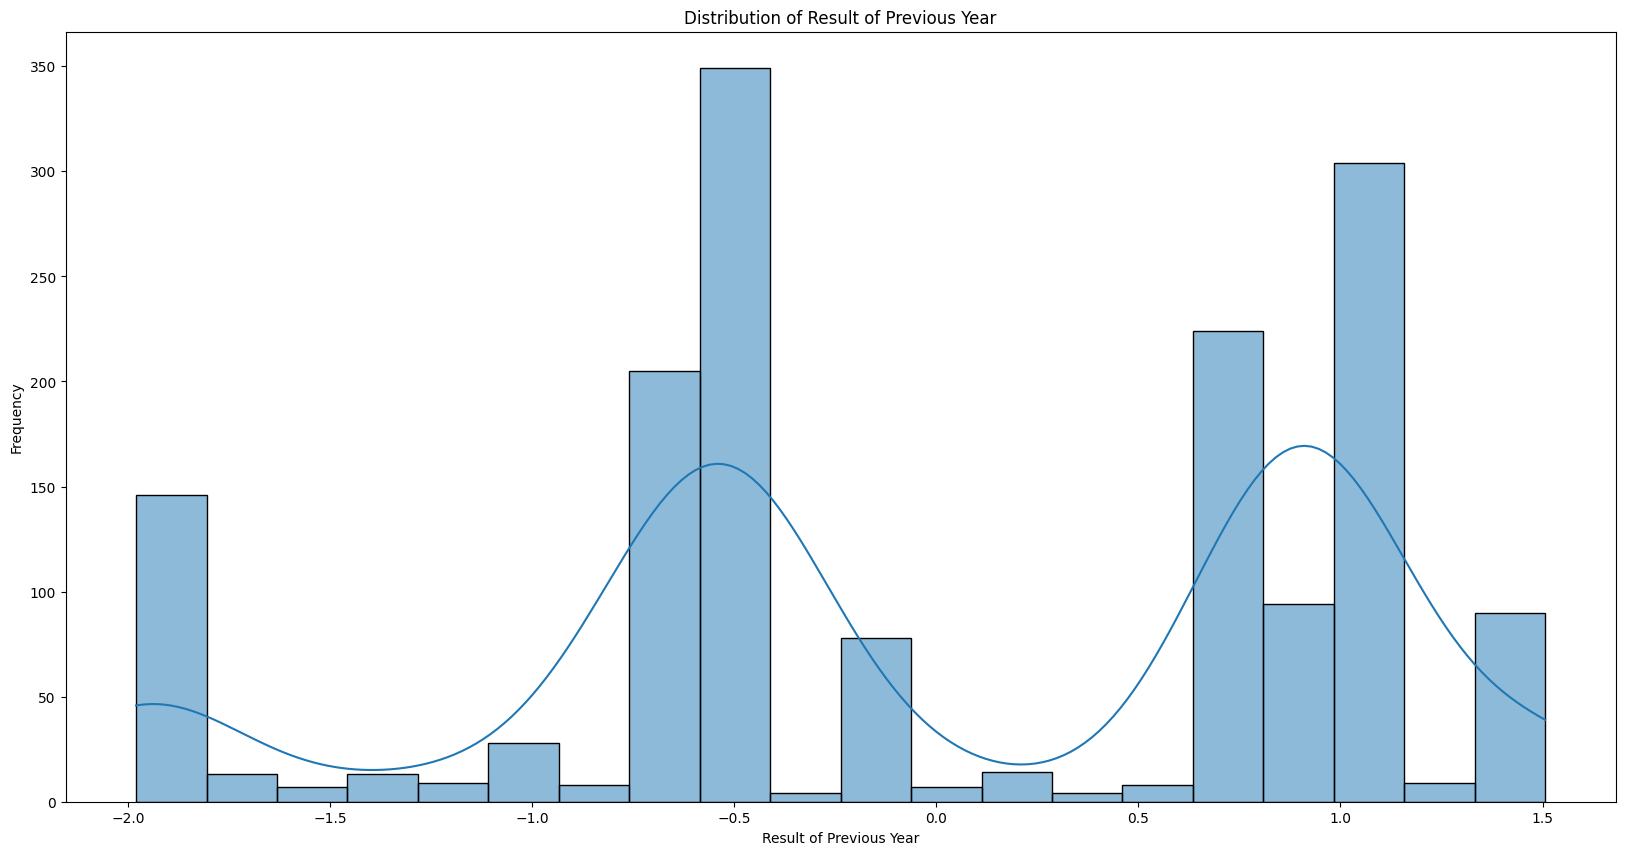

In [236]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_scaled, x='resultat_annee_prec', bins=20, kde=True)
plt.title('Distribution of Result of Previous Year')
plt.xlabel('Result of Previous Year')
plt.ylabel('Frequency')
plt.show()

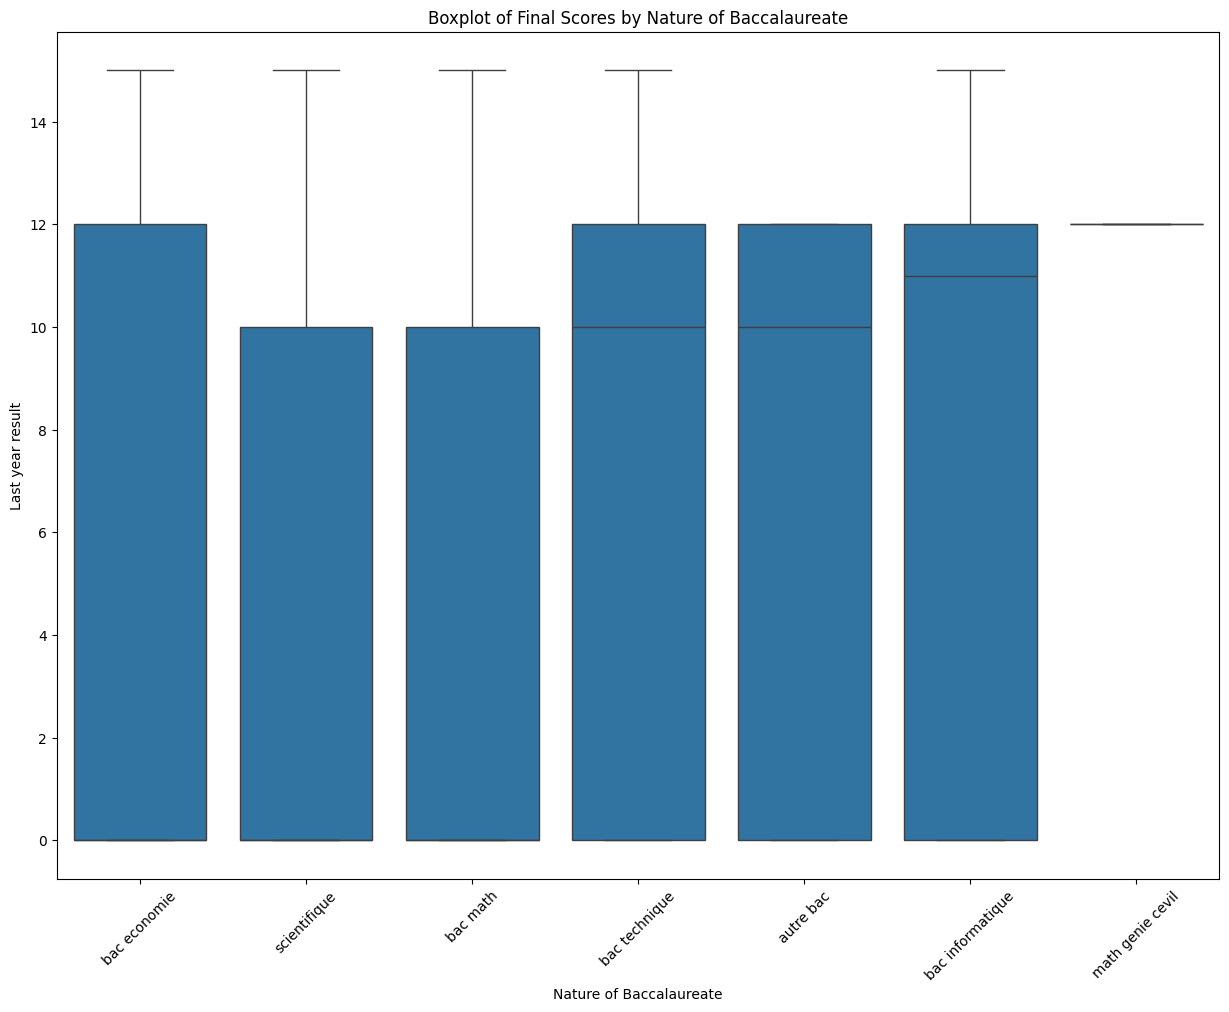

In [312]:
# 2. Boxplot
plt.figure(figsize=(15, 11))
sns.boxplot(data=df_copy, x='lib_nature_bac', y='resultat_annee_prec')
plt.title('Boxplot of Final Scores by Nature of Baccalaureate')
plt.xlabel('Nature of Baccalaureate')
plt.ylabel('Last year result')
plt.xticks(rotation=45)
plt.show()


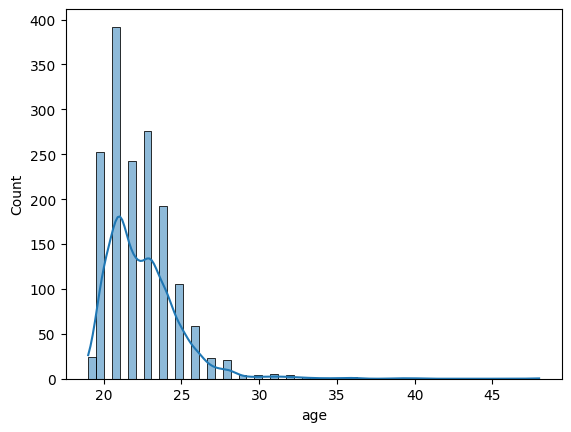

In [238]:
# Visualizations
sns.histplot(df_copy['age'], kde=True)
plt.show()

### TODO

In [385]:
df_copy['year_gap']=df_copy['date_bac']-df_copy['date_entree_esp_et']

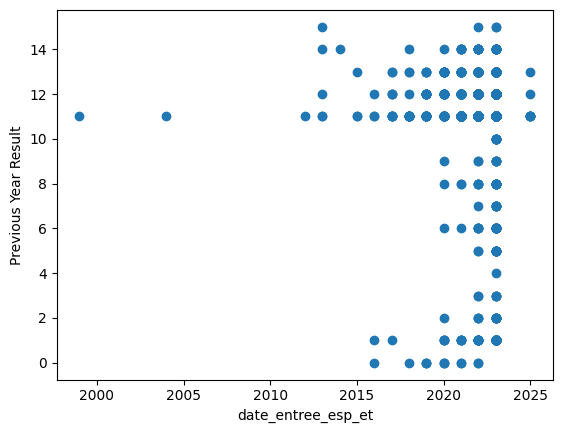

In [387]:
# Assuming 'resultat_annee_prec_map' contains the original values before labeling
plt.scatter(df_copy['date_entree_esp_et'], df_copy['resultat_annee_prec'])
plt.xlabel('date_entree_esp_et')
plt.ylabel('Previous Year Result')
plt.show()


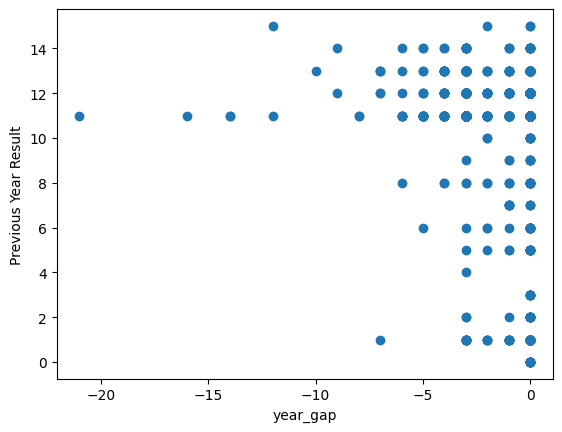

In [388]:
plt.scatter(df_copy['year_gap'],df_copy['resultat_annee_prec'])
plt.xlabel('year_gap')
plt.ylabel('Previous Year Result')
plt.show()


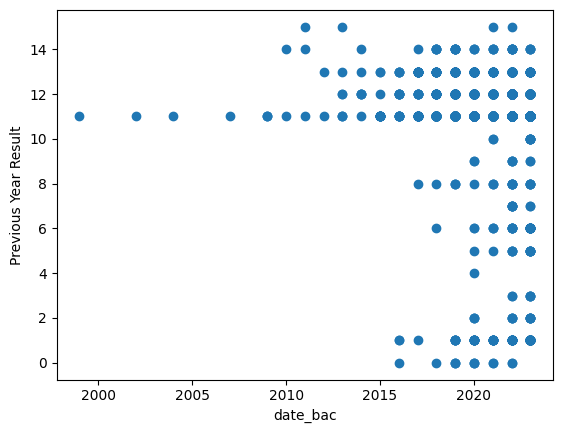

In [389]:
plt.scatter(df_copy['date_bac'],df_copy['resultat_annee_prec'])
plt.xlabel('date_bac')
plt.ylabel('Previous Year Result')
plt.show()


In [397]:
df_copy['date_bac'].loc[df_copy['date_bac']==1999]

1428    1999
Name: date_bac, dtype: int64

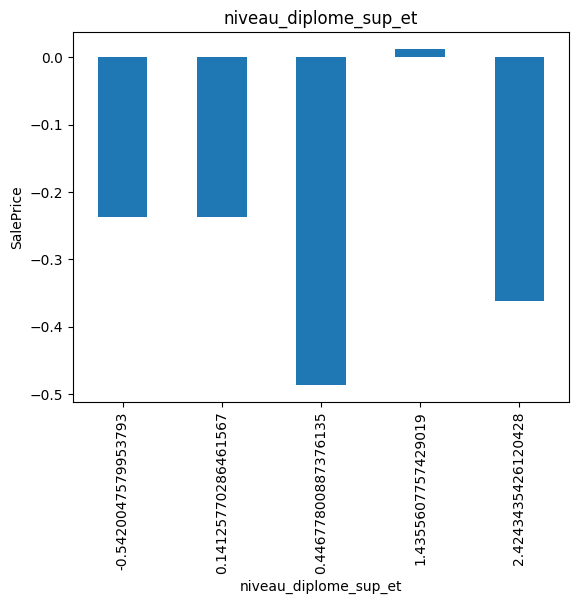

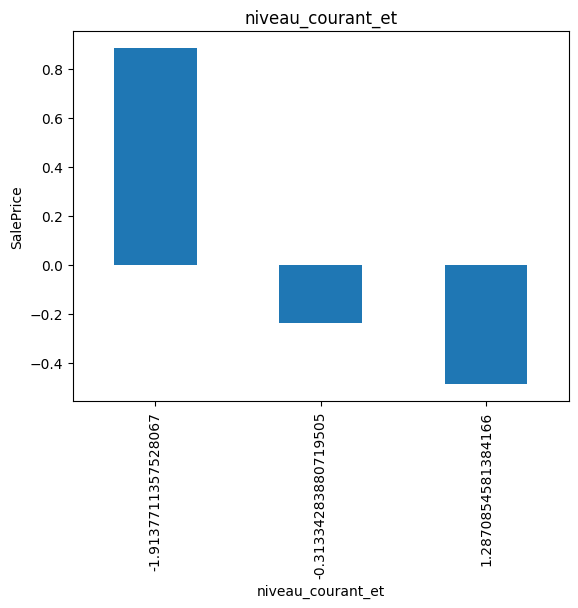

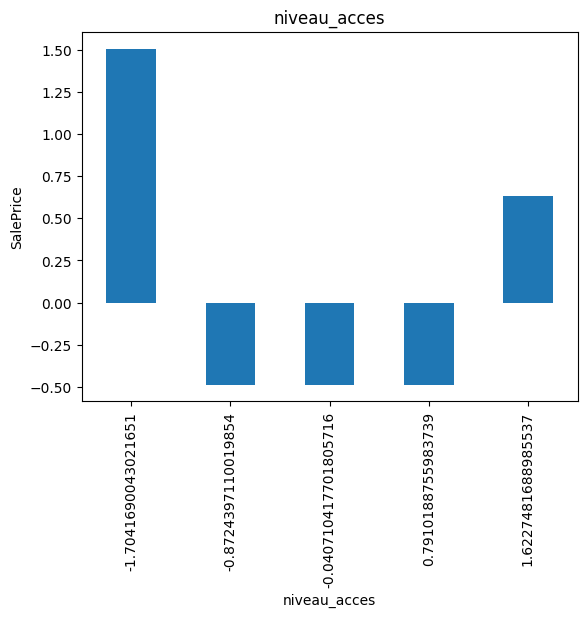

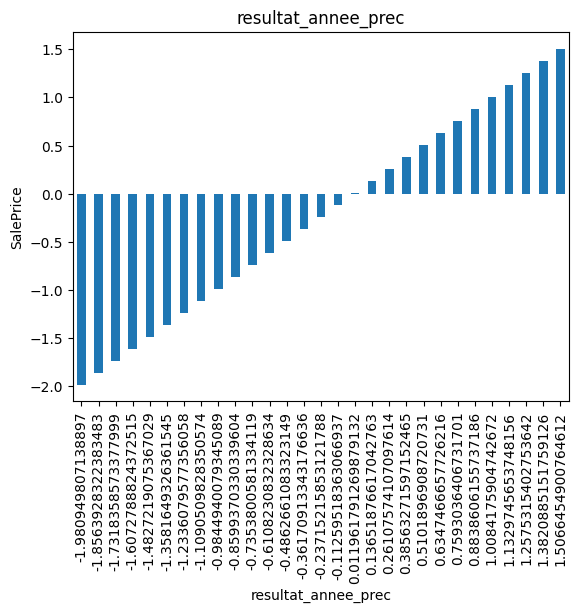

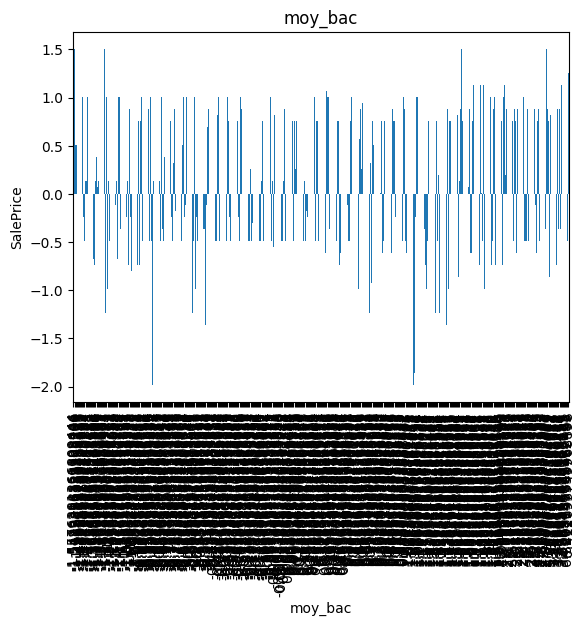

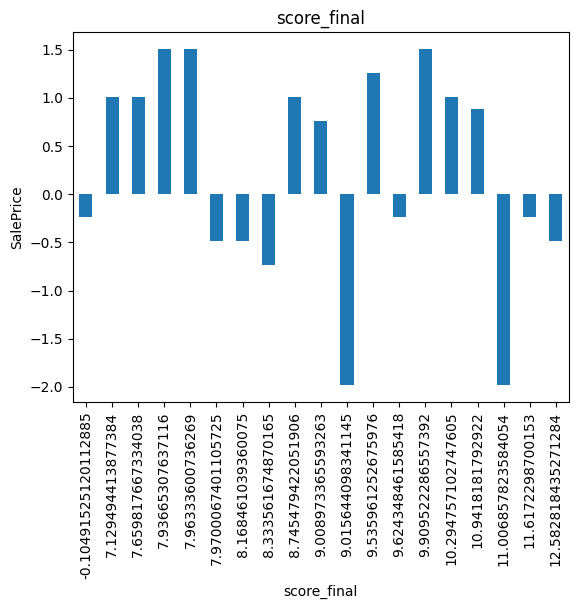

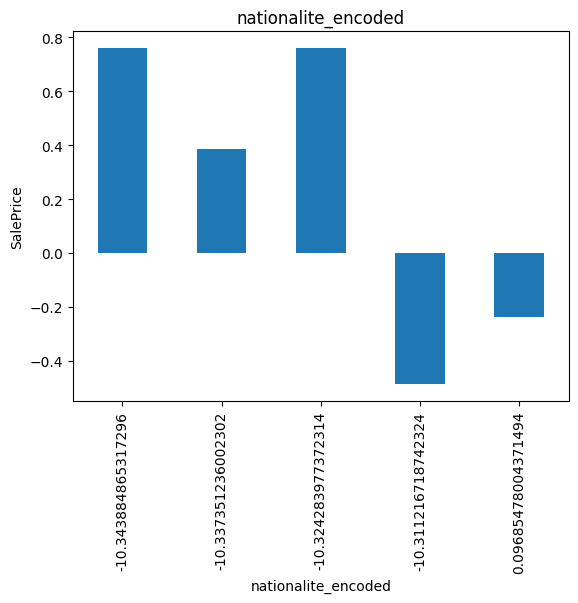

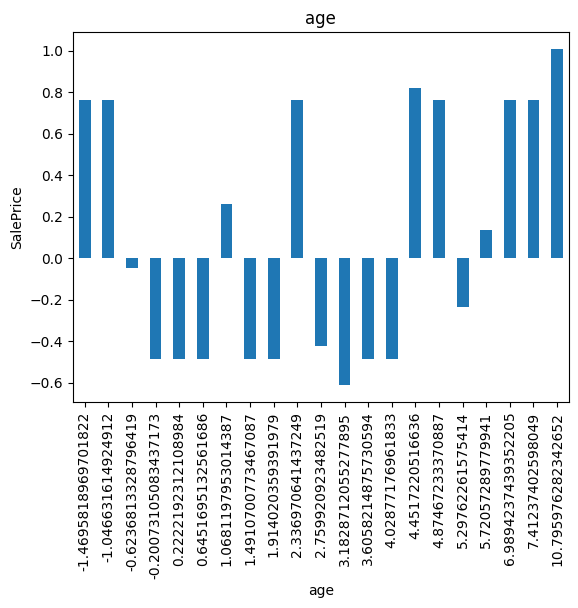

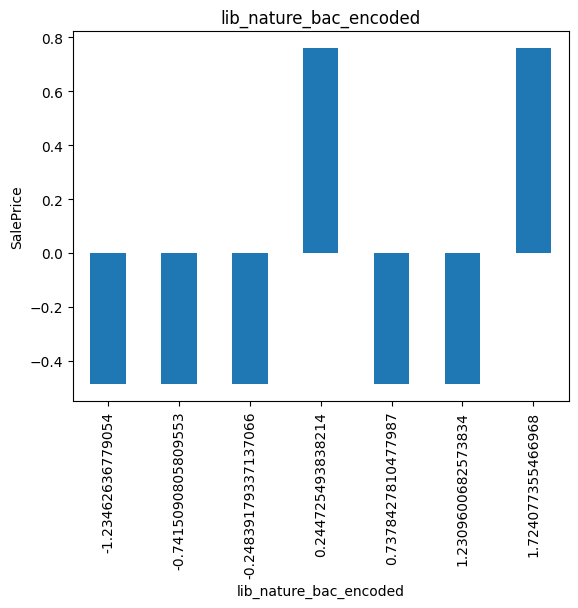

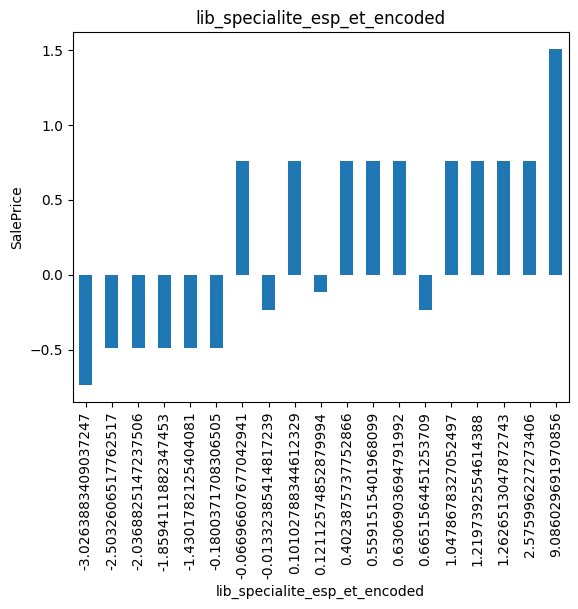

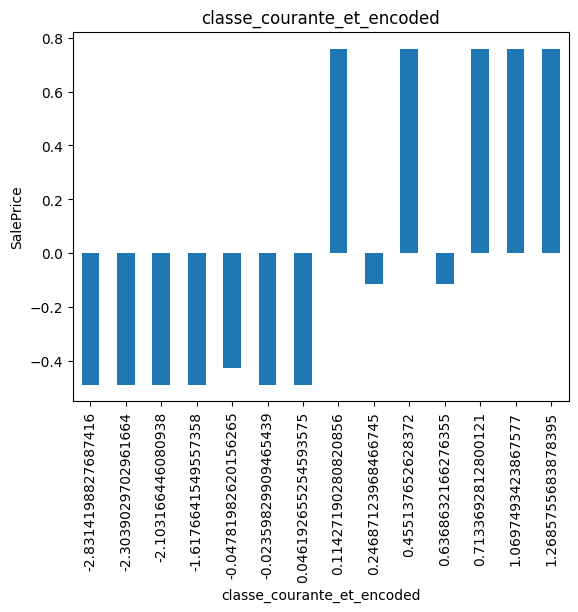

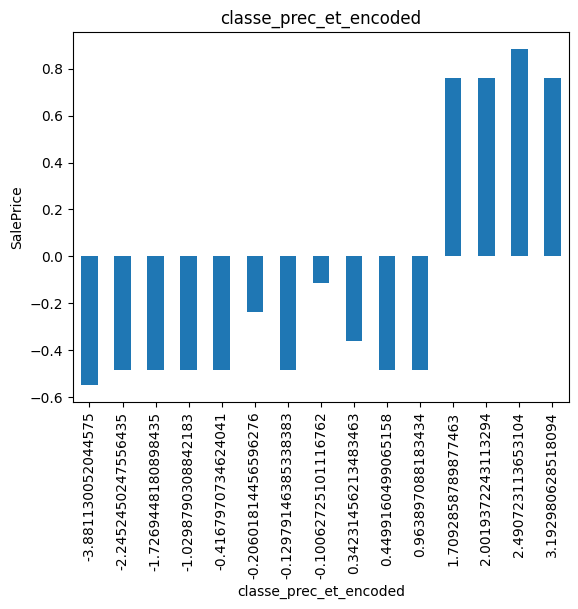

In [67]:
## Lets Find the realtionship between them and Sale PRice
for feature in df_scaled.select_dtypes(include=['int64', 'float64']).columns:
    data=df_scaled.copy()
    data.groupby(feature)['resultat_annee_prec'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [666]:
'''#pair plot
plt.figure(figsize=(20, 15))
sns.pairplot(df_copy)
plt.show()'''


'#pair plot\nplt.figure(figsize=(20, 15))\nsns.pairplot(df_copy)\nplt.show()'

## Feature Selection

In [668]:
'''from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create Copies of the DataFrame for Each Technique
df_scaled_var = df_scaled.copy()
df_scaled_kbest = df_scaled.copy()
df_scaled_rfe = df_scaled.copy()
df_scaled_tree = df_scaled.copy()

# Step 2: Apply Feature Selection Techniques

# Low Variance
selector = VarianceThreshold(threshold=0.1)
df_scaled_var = selector.fit_transform(df_scaled_var)
df_scaled_var = pd.DataFrame(df_scaled_var, columns=df_copy.columns[selector.get_support()])

#Test Annova
#chi2 test
#f_classif test
#Rsquare test
# SelectKBest
X = df_scaled_kbest.drop(columns=['resultat_annee_prec'])
y = df_scaled_kbest['resultat_annee_prec']
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_kbest = select_k_best.fit_transform(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]
df_scaled_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)

# RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]
df_scaled_rfe = pd.DataFrame(fit.transform(X), columns=selected_features_rfe)

# Tree-based
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_tree = X.columns[indices[:10]]
df_scaled_tree = df_scaled_tree[selected_features_tree]

# Step 3: Visualize Selected Features

# Bar plot for feature importances (Tree-based)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Tree-based)')
plt.bar(range(len(selected_features_tree)), importances[indices[:10]], align='center')
plt.xticks(range(len(selected_features_tree)), selected_features_tree, rotation=90)
plt.show()

# Step 4: Evaluate Model Performance

# Function to evaluate model performance
def evaluate_model(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique
accuracy_var = evaluate_model(df_copy, y, df_scaled_var.columns)
accuracy_kbest = evaluate_model(df_copy, y, selected_features_kbest)
accuracy_rfe = evaluate_model(df_copy, y, selected_features_rfe)
accuracy_tree = evaluate_model(df_copy, y, selected_features_tree)

# Print the accuracies
print(f"Accuracy (Low Variance): {accuracy_var:.4f}")
print(f"Accuracy (SelectKBest): {accuracy_kbest:.4f}")
print(f"Accuracy (RFE): {accuracy_rfe:.4f}")
print(f"Accuracy (Tree-based): {accuracy_tree:.4f}")'''

'from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE\nfrom sklearn.ensemble import ExtraTreesClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Step 1: Create Copies of the DataFrame for Each Technique\ndf_scaled_var = df_scaled.copy()\ndf_scaled_kbest = df_scaled.copy()\ndf_scaled_rfe = df_scaled.copy()\ndf_scaled_tree = df_scaled.copy()\n\n# Step 2: Apply Feature Selection Techniques\n\n# Low Variance\nselector = VarianceThreshold(threshold=0.1)\ndf_scaled_var = selector.fit_transform(df_scaled_var)\ndf_scaled_var = pd.DataFrame(df_scaled_var, columns=df_copy.columns[selector.get_support()])\n\n#Test Annova\n#chi2 test\n#f_classif test\n#Rsquare test\n# SelectKBest\nX = df_scaled_kbest.drop(columns=[\'resultat_annee_prec\'])\ny = df_scaled_kbest[\'resultat_annee_prec\']\nselect_k_best = Sel

In [669]:
'''from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df_scaled_pca=df_scaled.copy()
X = df_scaled_pca.drop(columns=['resultat_annee_prec'])
y = df_scaled_pca['resultat_annee_prec']
# Fit PCA to the data
pca = PCA().fit(X)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Identify the number of components that capture at least 95% of the variance
num_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components that capture at least 95% of the variance: {num_components_95}") '''

'from sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\nimport numpy as np\ndf_scaled_pca=df_scaled.copy()\nX = df_scaled_pca.drop(columns=[\'resultat_annee_prec\'])\ny = df_scaled_pca[\'resultat_annee_prec\']\n# Fit PCA to the data\npca = PCA().fit(X)\n\n# Plot cumulative explained variance ratio\nplt.figure(figsize=(10, 6))\nplt.plot(np.cumsum(pca.explained_variance_ratio_), marker=\'o\', linestyle=\'--\')\nplt.axhline(y=0.95, color=\'r\', linestyle=\'-\')\nplt.xlabel(\'Number of Components\')\nplt.ylabel(\'Cumulative Explained Variance\')\nplt.title(\'Cumulative Explained Variance by Principal Components\')\nplt.grid(True)\nplt.show()\n\n# Identify the number of components that capture at least 95% of the variance\nnum_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1\nprint(f"Number of components that capture at least 95% of the variance: {num_components_95}") '

In [670]:
'''#Principal Component Analysis and visualize the variance explained by each component
from sklearn.decomposition import PCA  
pca = PCA(n_components=6)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % (fit.explained_variance_ratio_,))
print(fit.components_)
print(fit.explained_variance_)
print(fit.explained_variance_ratio_)'''

'#Principal Component Analysis and visualize the variance explained by each component\nfrom sklearn.decomposition import PCA  \npca = PCA(n_components=6)\nfit = pca.fit(X)\n# summarize components\nprint("Explained Variance: %s" % (fit.explained_variance_ratio_,))\nprint(fit.components_)\nprint(fit.explained_variance_)\nprint(fit.explained_variance_ratio_)'

In [ ]:
# Option 1: L1-regularized Logistic Regression
from sklearn.linear_model import LogisticRegression
feature_sel_model_LG = SelectFromModel(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
)
feature_sel_model_LG.fit(X_train, y_train)
selected_feat_LG = X_train.columns[(feature_sel_model_LG.get_support())]

print('\nStats for Logistic Regression:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_[0] == 0)))
print(selected_feat_LG)

# Option 2: L1-regularized Linear SVC
from sklearn.svm import LinearSVC
feature_sel_model_SVM = SelectFromModel(
    LinearSVC(penalty='l1', dual=False, random_state=0)
)
feature_sel_model_SVM.fit(X_train, y_train)
selected_feat_SVM = X_train.columns[(feature_sel_model_SVM.get_support())]

print('\nStats for Linear SVC:')
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_[0] == 0)))
print(selected_feat_SVM)

#### Evaluate Model Performance with Regularization

In [671]:
'''# Function to evaluate model performance with regularization
def evaluate_model(X, y, selected_features, penalty='l2', C=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate performance for each technique with L2 regularization
accuracy_var_l2 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l2')
accuracy_kbest_l2 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l2')
accuracy_rfe_l2 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l2')
accuracy_tree_l2 = evaluate_model(df_copy, y, selected_features_tree, penalty='l2')

# Evaluate performance for each technique with L1 regularization
accuracy_var_l1 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l1')
accuracy_kbest_l1 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l1')
accuracy_rfe_l1 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l1')
accuracy_tree_l1 = evaluate_model(df_copy, y, selected_features_tree, penalty='l1')'''

"# Function to evaluate model performance with regularization\ndef evaluate_model(X, y, selected_features, penalty='l2', C=1.0):\n    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)\n    model = LogisticRegression(max_iter=1000, penalty=penalty, C=C, solver='liblinear')\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    accuracy = accuracy_score(y_test, y_pred)\n    return accuracy\n\n# Evaluate performance for each technique with L2 regularization\naccuracy_var_l2 = evaluate_model(df_copy, y, df_scaled_var.columns, penalty='l2')\naccuracy_kbest_l2 = evaluate_model(df_copy, y, selected_features_kbest, penalty='l2')\naccuracy_rfe_l2 = evaluate_model(df_copy, y, selected_features_rfe, penalty='l2')\naccuracy_tree_l2 = evaluate_model(df_copy, y, selected_features_tree, penalty='l2')\n\n# Evaluate performance for each technique with L1 regularization\naccuracy_var_l1 = evaluate_model(df_copy, y, df_scaled_v

### Splitting the dataset 

In [672]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'

### Clustering

### K-Means

In [ ]:
#visualize the best number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled_tree)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Clustering Analysis

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def perform_clustering(df_scaled, method='kmeans', n_clusters=3, eps=0.5, min_samples=5):
    """
    Perform clustering using the specified method and parameters.
    """
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=eps, min_samples=min_samples)
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Unsupported clustering method.")
    
    labels = model.fit_predict(df_scaled)
    return labels

def evaluate_clustering(df_scaled, labels, method):
    """
    Evaluate clustering performance using silhouette score and Davies-Bouldin index.
    """
    if len(set(labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(df_scaled, labels)
        davies_bouldin = davies_bouldin_score(df_scaled, labels)
        print(f"{method} - Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}")
    else:
        print(f"{method} - Only one cluster formed.")

def visualize_clusters(df_scaled, labels_dict):
    """
    Visualize clusters using PCA for dimensionality reduction.
    """
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    
    plt.figure(figsize=(12, 4))
    for i, (method, labels) in enumerate(labels_dict.items(), 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
        plt.title(f'{method} Clustering')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    plt.tight_layout()
    plt.savefig('clustering_visualization.png')
    plt.close()



#### Train a K-Means Clustering Model

In [ ]:
# Train Clustering Models
    kmeans_labels = perform_clustering(df_scaled, method='kmeans', n_clusters=3)
    dbscan_labels = perform_clustering(df_scaled, method='dbscan', eps=0.5, min_samples=5)
    hierarchical_labels = perform_clustering(df_scaled, method='hierarchical', n_clusters=3)

#### Evaluate Clustering

In [ ]:
# Evaluate Clustering
    print("\nClustering Evaluation:")
    evaluate_clustering(df_scaled, kmeans_labels, 'K-Means')
    evaluate_clustering(df_scaled, dbscan_labels, 'DBSCAN')
    evaluate_clustering(df_scaled, hierarchical_labels, 'Hierarchical')

#### Visualize Clusters

In [ ]:
# Visualize Clusters
    labels_dict = {
        'K-Means': kmeans_labels,
        'DBSCAN': dbscan_labels,
        'Hierarchical': hierarchical_labels
    }
visualize_clusters(df_scaled, labels_dict)

### KNN

In [ ]:
#visualize the best number of neighbors
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### Train a KNN Classifier

In [ ]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


#### KNN Model Evaluation

In [ ]:
from sklearn.metrics import cross_val_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

#### Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")